# Computing Project - Initial

In [16]:
%notebook inline

#### Imports

In [33]:
import numpy as np
import matplotlib.pyplot as plt

#### Constants

In [ ]:
G = 6.67430e-11 # m^3 kg^-1 s^-2
m_e = 5.972e24 # kg
m_m = 7.348e22 # kg
r = 384400000 # m
time_step = 3600 #s

## Functions

In [ ]:
def pos_earth_moon(time_step,circular=True):
    """
    This function returns the position of the Earth-Moon about it's barycenter

    Inputs: 
        time_step - interval of time in seconds which the position is to be calculated

    Outputs
        pos - Array size (2,2,int(max_time/timestep))
        e.g. pos[0][0] gives the x position of the Earth at each time step
             pos[0][1] gives the y position of the Earth at each time step
             pos[1][0] gives the x position of the Moon at each time step
             pos[1][1] gives the y position of the Moon at each time step
    """
    if circular:
        T = 2*np.pi*np.sqrt(r**3/(G*(m_e + m_m)))
        # Angular velocity
        omega = 2*np.pi/T # rad/s

        # Time array
        max_time = 2*T
        time = np.arange(0, max_time, time_step) #s

        # Position arrays
        pos = np.zeros((2,2,len(time)))

        # Earth position (assuming circular orbit around barycenter)
        r_e = r*m_m/(m_e + m_m) # m
        x_e = r_e * np.cos(omega*time) # x position of Earth, m
        y_e = r_e * np.sin(omega*time) # y position of Earth, m

        # Moon position (assuming circular orbit around barycenter)
        r_m = r*m_e/(m_e + m_m) # m
        x_m = -r_m * np.cos(omega*time) # x position of Moon, m
        y_m = -r_m * np.sin(omega*time) # y position of Moon, m
        return x_e, y_e, x_m, y_m
    else:
        raise(NotImplementedError("Elliptical orbits not yet implemented"))

In [ ]:
# Example usage
x_e, y_e, x_m, y_m = pos_earth_moon(time_step)

# Plotting

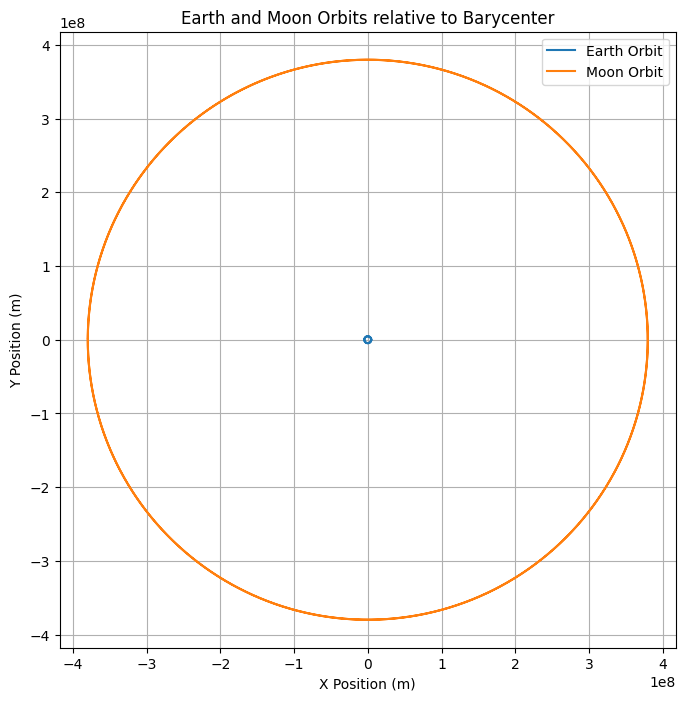

In [38]:
# Create figure and axes explicitly
fig = plt.figure(figsize=(8, 8))  # adjustable figure size
ax = plt.axes()  # creates a single Axes object

# Plot on the specific Axes
ax.plot(x_e, y_e, label='Earth Orbit')
ax.plot(x_m, y_m, label='Moon Orbit')

# Add labels, legend, grid
ax.set_xlabel('X Position (m)')
ax.set_ylabel('Y Position (m)')
ax.set_title('Earth and Moon Orbits relative to Barycenter')
ax.legend()
ax.grid(True)

# Equal aspect ratio for orbits
ax.set_aspect('equal', 'box')

plt.show()